# Cats VS Dogs


**Cats and Dogs** images are classified using Keras which is a high-level neural networks API, written in Python and running on top of TensorFlow and other library used are ->
* cv2
* numpy
* matplotlib.py
* os 



In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dropout,Dense,Flatten,Activation
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

/home/phantom/.conda/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**pre_pro** is a function that extracts images and do the Preprocessing-->
* Resizing the image
* Creating input and output sets


In [2]:
def pre_pro(Dir,img_h,img_w):
    y = []
    x = []
    for img in os.listdir(Dir):
        t=[]
        label = img.split('.')[-3]
        if label == 'cat':
            t = [1,0]
        elif label == 'dog' :
            t = [0,1]
        path = os.path.join(Dir,img)    
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(img_h,img_w))
        x.append(np.array(img))
        y.append(t)
    x = np.array(x)
    y = np.array(y)
    
    return x,y

### 2000 training images resized to 100(img_width) X 100(img_height) X 3(BGR channels) dimension
### 500 validation images resized to 100X100X3 dimension

In [3]:
img_h = 100
img_w = 100

Train = 'pics/Train'
Valid = 'pics/Valid'

train_x,train_y = pre_pro(Train,img_h,img_w)
print('\nTraining input data dimensions',train_x.shape,'\nTraining output data dimensions',train_y.shape)


valid_x,valid_y = pre_pro(Valid,img_h,img_w)
print('\n\nValidation input data dimensions',valid_x.shape,'\nValidation output data dimensions',valid_y.shape)




Training input data dimensions (2000, 100, 100, 3) 
Training output data dimensions (2000, 2)


Validation input data dimensions (500, 100, 100, 3) 
Validation output data dimensions (500, 2)


### Model used is squential 
Image is passed through 3 layer before flattening each involves->
* Convolving of image
* Activation of node with relu 
* MaxPooling of image

Flattened image is passed through three FC with relu activation

Softmax is used in last layer as classifier 


In [6]:
model = Sequential()

model.add(Conv2D(20, (3, 3), input_shape=(img_w, img_h, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(40, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('relu'))



model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 20)        560       
_________________________________________________________________
activation_9 (Activation)    (None, 98, 98, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 20)        3620      
_________________________________________________________________
activation_10 (Activation)   (None, 47, 47, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 40)        7240      
__________

### Epoch = 25
**30 times forward pass and backward pass of all the training examples.**
### Batch_size = 30
**30 the number of training examples in one forward/backward pass.**

In [7]:
model.fit(train_x, train_y,
          epochs=30,
          batch_size=30,
          validation_data=(valid_x, valid_y))
model.save_weights('weights.h5')

Train on 2000 samples, validate on 500 samples
Epoch 1/30
2000/2000 [==============================] - 14s 7ms/step - loss: 3.0259 - acc: 0.4945 - val_loss: 0.6950 - val_acc: 0.5240
Epoch 2/30
2000/2000 [==============================] - 14s 7ms/step - loss: 0.7095 - acc: 0.5115 - val_loss: 0.6923 - val_acc: 0.4980
Epoch 3/30
2000/2000 [==============================] - 14s 7ms/step - loss: 0.7145 - acc: 0.5270 - val_loss: 0.6884 - val_acc: 0.5540
Epoch 4/30
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6999 - acc: 0.5620 - val_loss: 0.6780 - val_acc: 0.5900
Epoch 5/30
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6915 - acc: 0.6010 - val_loss: 0.6638 - val_acc: 0.5940
Epoch 6/30
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6920 - acc: 0.6120 - val_loss: 0.6673 - val_acc: 0.6100
Epoch 7/30
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6610 - acc: 0.6440 - val_loss: 2.6875 - val_acc: 0.5080
Epoch 8/

### Test directory contains 5 image for testing the model

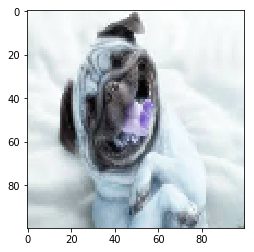

           Its dog


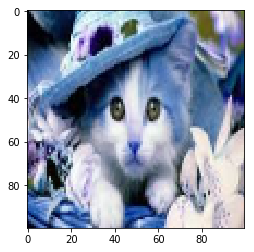

           Its cat


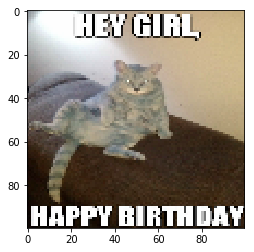

           Its cat


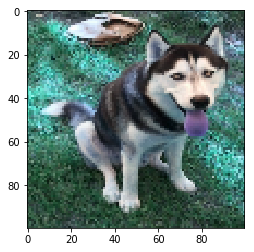

           Its dog


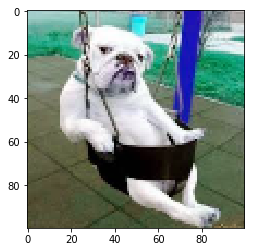

           Its dog


In [8]:
Test = 'pics/Test'
for img in os.listdir(Test):
    path = os.path.join(Test,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(img_h,img_w))
    plt.imshow(img)
    plt.show()
    test_img = np.array(img) 
    np.save("test.npy",test_img)
    test_img= np.expand_dims(test_img, axis=0)
    y = model.predict(test_img)
    if y[0][0]>y[0][1]:
        print('           Its cat')
    elif  y[0][1]>y[0][0]:
        print('           Its dog')
 
    
    